In [121]:
import requests
import pandas as pd
import json
import regex as re
import geopandas
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app")
#import matplotlib.pyplot as plt
import numpy as np
import folium
#from folium.plugins import MarkerCluster

In [90]:
# Use CMS Dataset Versions UUID and not Dataset Type Identifier 
cms_data_version="7a101036-1595-443f-84b8-6bffca1786b8"
resp = requests.get(f"https://data.cms.gov/data-api/v1/dataset/{cms_data_version}/data")


headers = {
    'accept': 'application/json',
}

y=0
dflist=[]
size1=5000 # determined by the data.cms.gov as max rows per call
rows=5000 # Check the data documentation to see the number of rows, this determines the number of loops to run below
looplength=1 + rows//size1

for x in range(looplength):
    offset1=y+x*size1
    #change params to ensure number of rows matches interest
    params = {
        'offset': offset1,
        'size': size1,
    }
    response = requests.get(f"https://data.cms.gov/data-api/v1/dataset/{cms_data_version}/data",
        params=params,
        headers=headers,
    )
    df=pd.read_json(json.dumps(response.json()))
    dflist.append(df)

full_data = pd.concat(dflist)
print(full_data)
print(full_data.columns)
full_data=full_data.dropna()

                        NPI                        PROVIDER NAME  \
0     1003081399 1013055110  BAART BEHAVIORAL HEALTH SERVICES IN   
1                1003150004                 AMS OF WISCONSIN LLC   
2                1003362484                         BHG XLII LLC   
3                1003368945                         RTS EDGEWOOD   
4                1003571647        METRO TREATMENT OF FLORIDA LP   
...                     ...                                  ...   
1438             1992835896      NEW BRUNSWICK COUNSELING CENTER   
1439             1992861553          AEGIS TREATMENT CENTERS LLC   
1440             1992861694  WESTSIDE METHADONE TREATMENT PROGRA   
1441             1992941702          CARNEGIE HILL INSTITUTE INC   
1442             1790700904                ATS AT JHBMC MFL BLDG   

                 ADDRESS LINE 1                       ADDRESS LINE 2  \
0               617 COMSTOCK RD                                STE 5   
1         9532 E 16 FRONTAGE RD        

/var/folders/l_/km51gp91251bkt2xgwqlv_5c0000gp/T/ipykernel_14584/1517458029.py:27: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_json(json.dumps(response.json()))
/var/folders/l_/km51gp91251bkt2xgwqlv_5c0000gp/T/ipykernel_14584/1517458029.py:27: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_json(json.dumps(response.json()))


In [117]:
#print(geolocator.geocode("5715 PRINCESS ANNE RD, VIRGINIA BEACH, USA").raw)
geolat=[]
geolong=[]
for z in range(len(full_data)): 
    x1=re.split(r',|( ste)|( st)',  full_data.loc[z,"ADDRESS LINE 1"].capitalize())[0]
    x2=full_data.loc[z,"ADDRESS LINE 2"]
    x3=full_data.loc[z,"CITY"].capitalize()
    x4=full_data.loc[z,"STATE"]
    x5=full_data.loc[z,"ZIP"][0:5]
    y=x1+","+x3+","+x4+","+x5+",US"
    full_data.loc[z,"address"]=y
    try:
        xlat=geolocator.geocode(y).raw['lat']
        xlon=geolocator.geocode(y).raw['lon']
        geolat.append(xlat)
        geolong.append(xlon)
        print(xlat)
        print(xlon)
    except:
        geolat.append(np.nan)
        geolong.append(np.nan)
full_data['lat']=geolat
full_data['lon']=geolong
full_data=full_data.reset_index()



44.20806725
-72.56420659097795
43.883453578984955
-91.17182021781852
39.4362314
-76.30550883836678
39.70622084639051
-84.1242151925496
39.91879075510204
-75.00475524489796
33.033769
-96.697435
33.77639116161616
-84.28084248484849
33.946877
-83.4179216
34.27836652148433
-119.28626118904135
41.3511573
-72.1060915
34.95653528571429
-120.435559
45.6691855
-122.5526535
44.4458197
-72.01388085018768
39.107563
-84.855077416
39.983989449999996
-105.22784181767075
42.653242763995394
-83.26532477792516
34.587025
-112.326714
33.582428
-112.272404
43.0241076
-88.0544343
34.068228673469385
-117.75193428571428
42.70237571862738
-71.16852750728204
42.45073590625
-70.96108856250001
42.564702600000004
-71.77395942848881
41.69698118367347
-71.14713995918368
42.6232392
-71.3509685056258
40.261003
-75.665089
42.33351865
-71.06650360002814
42.40359028
-82.96854682285715
32.229007
-110.877456
32.2282767
-111.0117406
41.8633103
-87.73522627433853
40.07225875057387
-75.03232436482335
38.049785
-84.49439
45.09

In [119]:
full_data.to_csv('/Users/manaskaushik/Documents/OpiodTreat/full_data.csv')
      
      

In [120]:
full_data['lat']

0              44.20806725
1       43.883453578984955
2                      NaN
3               39.4362314
4                      NaN
               ...        
1438     40.00681764251886
1439           34.27043375
1440             37.782267
1441            40.7833538
1442     39.28731076569038
Name: lat, Length: 1443, dtype: object

<Axes: >

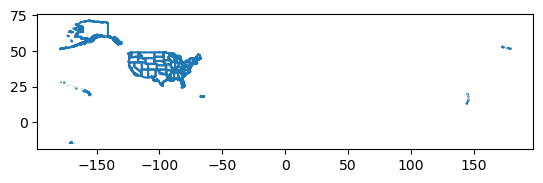

In [99]:
#import geodatasets
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
states = geopandas.read_file('/Users/manaskaushik/Desktop/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
states.head()
#states.plot()
states.boundary.plot()

In [126]:
full_data[['lat', "lon"]]

,lat,lon
0,44.20806725,-72.56420659097795
1,43.883453578984955,-91.17182021781852
2,NaN,NaN
3,39.4362314,-76.30550883836678
4,NaN,NaN
...,...,...
1438,40.00681764251886,-74.79629830386423
1439,34.27043375,-118.78466884281082
1440,37.782267,-122.4360284
1441,40.7833538,-73.9529124


(-197.09527795, 197.72483895, -18.84439205, 75.66085505)

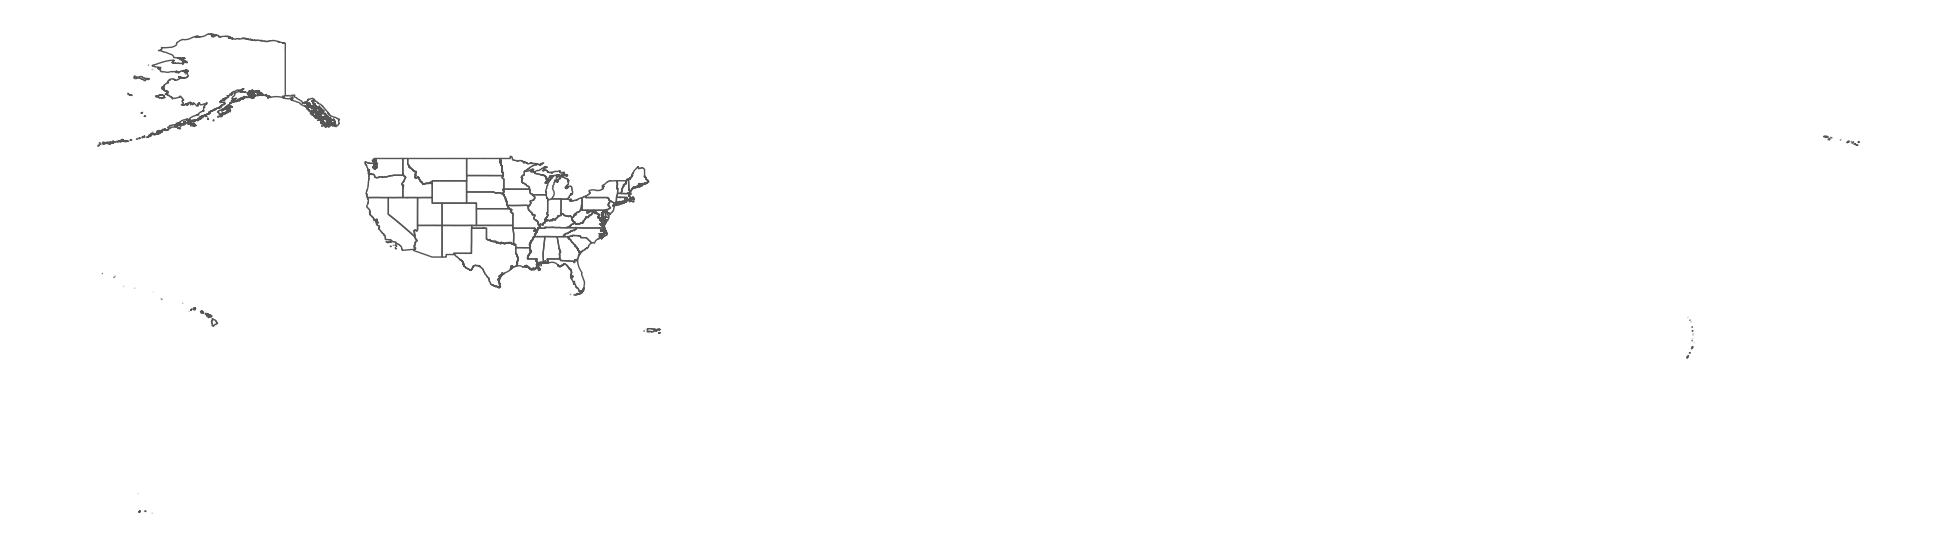

In [101]:
#states.plot(cmap='magma', figsize=(12, 12))
#us_map = states.boundary.plot(figsize=(25, 14),  color="#555555", linewidth=1)
#us_map.axis('off')

In [130]:
full_data=full_data.dropna()
#m = folium.Map(location=full_data[['lat', "lon"]].mean().to_list(), zoom_start=2)

TypeError: Could not convert ['44.2080672543.88345357898495539.436231439.7062208463905139.9187907551020433.03376933.7763911616161633.94687734.2783665214843341.351157334.9565352857142945.669185544.445819739.10756339.98398944999999642.65324276399539434.58702533.58242843.024107634.06822867346938542.7023757186273842.4507359062542.56470260000000441.6969811836734742.623239240.26100342.3335186542.4035902832.22900732.228276741.863310340.0722587505738738.04978545.0905161212121246.848643202020238.4121808443189638.4121808443189636.0779662857142839.15727010000000540.25892534.2066177799002138.64257329999999538.5851121912399339.30090020559275439.8129253214851639.1429318767301143.0553610542.3673063437529.708773437540.7250665891939134.70064541.802203440.6231366734693838.9011001428571433.300764186651143.628539532.847208740.6600874382185137.8042236535.39726335.361825137.64711595829598441.4910852542.3265430204081640.7643078537.2879279988041432.8746476568685839.9820300027440941.50388539.13009640.129207940.08112458120789539.88900442.01521250000000433.7713729795918447.611671637.78223737.98951537488828533.538807341.87882130.25891339.3023158571428630.2957721077096140.41460734.23210539.888829440.7447699540.84587740.8532720816326540.825573740.883948340.810018340.406078242.54587239.566346433.885526738.2129096536.680364238.648358639.301733932.66403541.407917941.09963231381513541.390930540.825764140.1996054197728135.00784156270659541.2085688784363132.4705921578947437.67646241012836634.76953643.092946743.212007341.5042753875278439.741226834.18500431.5437233182726738.932843134.21765638775510639.256104003651437.3830904535.9745357551020439.60380453904727529.35625866666666529.75471229.70460326530612239.984266439.9286129.48429232.333166151211541.3333330420996841.7912584489795939.150166239.3540222541.545082804183543.0154837.3061391428571439.7973887977673938.028826628.0135395102040832.87485424581899540.11391874971915435.7695853673469440.45382241.881026240.8823348181818245.5628438566660440.7120606102228235.55445704725527636.462934163265330.40254125000000232.24337257142856642.361681140.7547255555555542.0941607604153229.640905944.4620277078430737.159987832.4497046922879848.46257083652362541.11365733.3701941.800005147.7507306308724832.771011341.301191839.282644733.3737109609605935.1033818205128240.7294485739694737.0870554024652744.7761128938370961.1814652762682242.5869033542.625171142.3858265714285726.61963238.1238876301019941.68846244.067385139.299324632.8779788640810739.31145234999999639.364255239.390244933.76833880291453533.138448835.5922544538.94897034999999636.77309599999999540.686870136.71160270846437635.7172572427421335.8848680925856541.525941340.6911310780286439.93582081632652639.60704540926289536.144142833.496129533.2096134.7302086390870141.79817833.68140835.37845135.37845135.37845135.37845135.2243261252009142.957123738.4184176938775540.04107589999999636.28652342049413434.87276012920301639.74037241.698868921.310596243.68246505000000545.44248426.679864541.7966048541.695959641.8241847180989741.776872241.75708541.716234541.49675745000000437.666756628.45239411351014534.11492225916896437.466235741.5294133.3807006286851532.48716735.851776478004339.9772966734693934.0040361377549139.2932143535.61983937.98030418413413433.917323238.4646804765100739.234553437.7911770536.0666936304078938.7551580623033439.3334913533.90209210166213439.1358292764784739.408338346.86516335.746444939.548496328143339.11620540.1458295918367440.2222159797866341.409468145.011281854148841.8038533646246147.67184730.19996130.67229455102040741.578333130.177321241.66192461224489641.9898709541.9084242.3151703265306144.9552442653061237.008182403022841.6725922857142941.417351940.665456439.74212640000000439.8144934.1348008571428634.18658067346938634.0066734703660533.4517193611312138.5483839757638330.58329975000000239.584604340.810643938.217129541.46952151238474535.0780034897959235.6643374535.270244835.13804544161378435.9981033647135536.7296121052631640.287411341.788068242.3595678367346938.37799838.4947148876842734.1717539387755132.7369857535.82939535.157646135.5799895726905928.02463839161512739.28797555555555534.7472549259373541.728969141.734085934.17940956677466636.77965797411343436.0078657040816335.63855346091112636.733954736.0562907465474139.610072542.4189138571428636.32065629064615643.0523452818947441.637304696969733.833478340.69771865658460539.8409157540.0286410378304535.91222727716474641.878465635.79819554639110638.445411439.35094853665644639.9703315570469847.40511784999999641.8927062544.781336835.7235115540.822684530.125053841.80457371428571635.483183941.0661576184210541.39871448979591441.782384835.0228427524487142.661760435.0511731866366435.405050936.75342412244897634.920207536.753019336.1139925384615432.30599739.18524616365310541.8803311672203240.725480940.66516679999999433.89473422448979532.6119241.191956336.08824928.364686641.92262535000000435.217407534.87180456883367435.75219441.964785235643540.4607938570641228.699107430.41996644.047492526.0890507979655433.9985488979591829.18878002781841433.582067892133238.57289238.9856110434782630.26798347.336557135.323212539.39061655000000440.8072149387755144.958878338.77479640.725862539.352314339.95330969721296632.3667802884651135.2508018530.085708387755144.679714839.7501070470956938.9184108502906540.696068202020237.77383165000000543.2377511111111142.4408303333333343.79160143478260638.76419410456911435.76904065663601529.455862739.8097412575514831.55121371428571638.481609050249933.9128337072402247.6075610542.740428744.639290239.271813128.03429247.88953109756097648.269525242.929666335.1928944285714343.089706141.60978445.39330959999999534.0284010763604435.9633747650771238.97129340.722432540.722432541.463639.685111339.320942835680539.896513439.352314319.71149735151700743.786955435.0331610769230834.235289639.93058370408163441.81210806107936432.5938305342465832.499842387755138.0697540612244941.1183186534.23956153241389441.52162493048554439.05676395000000433.5633084540.1225615503950333.96776728148116644.963857140.96958732.79697836.74598842.92155873469387535.1078415131840839.29912529901919534.57977473498150534.179445846.800370734.46844178200072436.32296207642488640.813367140.8835791664193541.112538439.285555548.20752695918367440.30141338775510534.35722088757131639.771372638.73879634.0846974364757733.9110459092954333.833478334.2066177799002140.815095343.449367744.9706994444444426.151504539.1751620164425933.238235139.512595434.18871964999999637.0995961202685238.4811060348837241.748478241.9041148539.6034612172093344.889458529.68507100842008539.1716804952698238.168503645.523027840.45855642.4179981531.45520129.69263093877551229.424600232.8477534.2017774901960832.8145579512195142.937230143.0278836543.113058842.27398435.0534956530.38631110204081842.352474332.01049739.215621339.548528137.14153841.8663815528.804064239.7374918542.0438442277571941.800391235.44653985022231529.44986241.757375432.175096646.1431641702991334.7380379591836840.559381672917527.933031922980643.600413944.2934279776527347.611620335.3303416147752645.75856696862375430.316165533.994135734.6905526713177533.401249627.48509940.9227318527.26528099542837734.5884800508184933.2006827959183733.18745887755101635.4748014285714335.1382289551986439.31834544999999539.145724727.26755644257808339.85208969424541439.1751179425030639.5950193928571543.205036642.81437342.2665100542.2008535789818342.490635642.383569942.458068942.52645275000000442.1985585542.2962597461441842.2790765541.793289241.30442740.67857820000000440.677177140.67857820000000434.03768050354871435.92295756451612541.2894747541.288949639.370243843.40666341.74904427.18914541.6717932653061233.5527036544.7871411527.85151862626262826.6176910503719936.2175964715053630.2905680749423433.433189733.45141232.655207866158533.40429533.459477236.7698119473684233.594743833.594743834.0846974364757740.846333334.3846378611695533.504788840.044730840.44723625.94313425.605811644.04812590474157539.1333672040816437.91693125000000542.94336742.0574640872391941.9628104828909235.29589333.12647539.433623430.233787539.7374918540.7418089677419435.9655995005693938.6396236.67616587532893436.67545385451574434.2280368484848526.00198938.359517535.1849024285714331.334938834.85227846407218533.4158874533.435014139.41797742.62553132.218278936.0272224838973436.19988036729256533.15518234.658642427492540.559700730.37426543775317442.56109842.538932342.3803831544.969307139.959411734.844002142.2663181107235437.0484115607521336.0826742857142937.24132532.17968551468490532.954183435.226094541.617792944.801625530.30188734.0583478665864436.739442133.9982981376498237.81010748614732435.11418331.62263788673673333.55225249999999438.35951337533.9682752142857242.6481276409817932.73884438919789440.94014350000000539.3007100204081633.5707466070041841.8515953541.129957433.65203275000000433.0482582081925739.2848233.3929098095217831.8452635714285740.706052535.0501198181818246.5951946257346641.0749147036421839.519627636.19805439.33156527.161827837.0144063539.6071945306122529.957290545.0201357612662242.6974510909090941.902353526.6542800358146132.165913840.4199560707070742.04258036734693634.09716810402371640.23684641.671671739.4993525278295735.2715430698062539.44698687861184540.7690451463414640.750412140.750412143.055919641.5890966541.7155253473895641.3250526020408228.539330138.9290058928571434.27661475510204533.5024361836734741.49635187234042642.2892289145728643.038257243.020555842.53367944.52393483783783543.0337091896180643.72292256272142.696759238.463667639.475097578992334.02090812747561435.5319037622862932.3337600093762125.930816941.85703838.895036835.458386628.26953749970241237.7489941.233111635.58400633.19483922415635.6669470698683135.73359565463917435.9128935.6784554568202835.8268139143399435.201322941.241021142.070042186553339.7349864447226940.677177142.8122861535.2033987050051937.35965843.0842055533.306253639.7810380816326538.122770639.070099835.7318875376549443.982788536.750836204555435.1117568757731436.97961909999999437.66077638.95297474948187539.010807837.88549141.4325467547169839.0823178527475440.51871368598952539.3350529091202138.7390764148487140.045740840.764027839.7400378142649540.1477822245853839.92977339.970346639.414965140.798198339.95615913043478441.6455757793482938.8606224519696439.4456216470588240.59810940.7590580608575341.4036001666666639.20013441.0275891714675140.07517755555555541.112598641.581350239.125165240.0025074769272840.4155823542.584381942.6005843109988439.848722538.8914914973593141.552575834.713019343.099752436.6717762204551734.2017774901960838.2480531428571434.97812678831266539.7525552541.009338660143137.1358914539.313418233.96146621714698541.725870640.71165734999999640.673095540.664185436.0686467813760735.590366239.646281139.2645634537.676240139.07397630.53090638607560739.4107368235294135.067033940.179911127.4803547346938835.9152159347826133.518538940.683386441.496447741.4937996537.73971786882529539.4841235534.54772656549561625.9050819387755137.17877941.8803311672203239.316613332.36630387043832.52348134.06169426.02100537.7587290211724740.2013495535.07775250505050540.62715740.516461740.639295233.9453630.08613526666666640.3381617447206537.971873642.11823437.46687364345119435.18430160305127435.989831332.80399841.04567015842603445.178935942.37045041666666430.564974840.6991680803503141.59986647976444433.87032089943629439.33719241.148369735.4703574113532143.5186529.419387840.726230737.98471598061845437.925388447.62363732.6730672809240133.7478961666666736.1556741480117631.96566434.0774767620316934.46450136888116638.90659359690159439.9876128711613144.1241417293697342.817695326.13836539133609844.010422140.25369999999999541.151310839.4548700480420236.162276739.4270064528.55281242.809196939.352314340.2246838481189233.87044234.1181808163265332.83147075724506440.6730709912785934.59341136734694534.76091920000000441.8445583538.5706887537.5809660545.97827965000000532.71298647.69169339.2331583469387829.20330640000000243.60374429.521486439.2727833536.5808027444473220.90346411972380447.048460532.2250662449364332.668936840.2229811555754544.836982334.1348008571428635.41674140.717148640.8050314666666740.8050314666666740.8050314666666740.80786215624999630.258741632.87869743.017084432.220691344.85671534.2571600612244945.85665585762440.237517828.6274595102040838.9619411540.783353833.90209210166213435.37819255102040533.151164438.7206554517658626.232862735.09241227659574541.758747745.79308328.45128641.44638033294090539.523618539.2873107656903842.027316936.09662446075887534.7067019233510340.6782642619047641.772863562534.1913706938775540.40585735000000533.4480740541.8953347545.0953124177848639.3259576542.2991565438704840.49347540.831415640.49166933.9169749795218445.5244143.05645252573645437.309391341.7512491547.17078581519541629.52890495650055426.1054398837209333.59648086486486640.13670090243902431.3218956060865644.6380863999322648.7755043888888947.663092640.4699418409975828.52778741.21307446169702635.20833441.9294689183673532.7166988979591839.51450138.2612632127274738.49505148389576440.8816150941042447.587674132.754822639.97991429.77239133.5842152222222240.237517833.9484564081632735.2681866053560340.7055439387755134.2163555791143139.29547437.933080547.9080870046317235.6661576682313739.98176633.615039733.74765739.179624536.04850540.915174432.8212441510454138.7364087214192334.5801024883720933.83403685714285642.8493896046511642.6849953636363627.435437443.5494230816326542.395944841.9428923496445542.8709655500039540.1212626161464941.168264241.172453934.7067019233510341.773784134.235289643.1057144294862241.32437428571428564.842917032708540.0333917532.7948386542.046808237.6994513200313140.84206126.759844.944835634.055376741.2444568167304446.3318608384561332.6790659445668639.98664428571428433.190010387755130.5250183233082739.957383534.18423884848484640.861022542.797548842.9697667407297234.000119939.0807330204081626.2171726.6115752542.53782429738435439.146093243.209239235.97704578450047639.29912529901919541.340126941.299081344.9486041965063937.311527634.0658156530612243.650316934.662749536.3243697321617434.6064070503402142.14513820000000542.29906775000000642.541100242.396155941.9452460542.312864142.58648379999999642.1327441.65277197757005542.4950587543.641871939.52422135000000547.587332339.0984631279458143.4509643061224533.87044236.7428761530.0859585714285733.706428561.216656947566945.57005832.72350359158486632.7587127539.7399886534.4709165990622338.867206332.44247436.865918541.6020877853634541.4985063832667633.49231140000000642.895081442.5005014541.567281742.900092332.8333561428571441.57890133.42411340.84587740.8532720816326540.825573740.883948340.810018337.6654217541.6013701541.68615291852013630.37617333.4135784538.582349937542.88373635.45170235.18944342.0866331.99184935.0669740569749329.905727435.7111397577685143.553250543.59370490000000640.347054335.581454339.6600291261908834.91244810000000638.15976639.23859214285714436.097134635312339.49891520901092440.56807354999999447.2231611020200847.266918101010147.16904287248322431.8109400133617434.995784837.06142932.4512276363636334.1626487272727341.6845838775510237.738988842.99566935.9890134.9515322448979644.999638239.8492034285714341.082297439.15419127.923204440.1823180674346834.06290834957832.26469683861467531.4764241836734738.051177340.0897498368924239.9018751428571439.9570508691403338.711618140.0068176425188634.2704337537.78226740.783353839.28731076569038'] to numeric

In [131]:
#import folium

#m = folium.Map(location=(45.5236, -122.6750))


TypeError: Could not convert ['44.2080672543.88345357898495539.436231439.7062208463905139.9187907551020433.03376933.7763911616161633.94687734.2783665214843341.351157334.9565352857142945.669185544.445819739.10756339.98398944999999642.65324276399539434.58702533.58242843.024107634.06822867346938542.7023757186273842.4507359062542.56470260000000441.6969811836734742.623239240.26100342.3335186542.4035902832.22900732.228276741.863310340.0722587505738738.04978545.0905161212121246.848643202020238.4121808443189638.4121808443189636.0779662857142839.15727010000000540.25892534.2066177799002138.64257329999999538.5851121912399339.30090020559275439.8129253214851639.1429318767301143.0553610542.3673063437529.708773437540.7250665891939134.70064541.802203440.6231366734693838.9011001428571433.300764186651143.628539532.847208740.6600874382185137.8042236535.39726335.361825137.64711595829598441.4910852542.3265430204081640.7643078537.2879279988041432.8746476568685839.9820300027440941.50388539.13009640.129207940.08112458120789539.88900442.01521250000000433.7713729795918447.611671637.78223737.98951537488828533.538807341.87882130.25891339.3023158571428630.2957721077096140.41460734.23210539.888829440.7447699540.84587740.8532720816326540.825573740.883948340.810018340.406078242.54587239.566346433.885526738.2129096536.680364238.648358639.301733932.66403541.407917941.09963231381513541.390930540.825764140.1996054197728135.00784156270659541.2085688784363132.4705921578947437.67646241012836634.76953643.092946743.212007341.5042753875278439.741226834.18500431.5437233182726738.932843134.21765638775510639.256104003651437.3830904535.9745357551020439.60380453904727529.35625866666666529.75471229.70460326530612239.984266439.9286129.48429232.333166151211541.3333330420996841.7912584489795939.150166239.3540222541.545082804183543.0154837.3061391428571439.7973887977673938.028826628.0135395102040832.87485424581899540.11391874971915435.7695853673469440.45382241.881026240.8823348181818245.5628438566660440.7120606102228235.55445704725527636.462934163265330.40254125000000232.24337257142856642.361681140.7547255555555542.0941607604153229.640905944.4620277078430737.159987832.4497046922879848.46257083652362541.11365733.3701941.800005147.7507306308724832.771011341.301191839.282644733.3737109609605935.1033818205128240.7294485739694737.0870554024652744.7761128938370961.1814652762682242.5869033542.625171142.3858265714285726.61963238.1238876301019941.68846244.067385139.299324632.8779788640810739.31145234999999639.364255239.390244933.76833880291453533.138448835.5922544538.94897034999999636.77309599999999540.686870136.71160270846437635.7172572427421335.8848680925856541.525941340.6911310780286439.93582081632652639.60704540926289536.144142833.496129533.2096134.7302086390870141.79817833.68140835.37845135.37845135.37845135.37845135.2243261252009142.957123738.4184176938775540.04107589999999636.28652342049413434.87276012920301639.74037241.698868921.310596243.68246505000000545.44248426.679864541.7966048541.695959641.8241847180989741.776872241.75708541.716234541.49675745000000437.666756628.45239411351014534.11492225916896437.466235741.5294133.3807006286851532.48716735.851776478004339.9772966734693934.0040361377549139.2932143535.61983937.98030418413413433.917323238.4646804765100739.234553437.7911770536.0666936304078938.7551580623033439.3334913533.90209210166213439.1358292764784739.408338346.86516335.746444939.548496328143339.11620540.1458295918367440.2222159797866341.409468145.011281854148841.8038533646246147.67184730.19996130.67229455102040741.578333130.177321241.66192461224489641.9898709541.9084242.3151703265306144.9552442653061237.008182403022841.6725922857142941.417351940.665456439.74212640000000439.8144934.1348008571428634.18658067346938634.0066734703660533.4517193611312138.5483839757638330.58329975000000239.584604340.810643938.217129541.46952151238474535.0780034897959235.6643374535.270244835.13804544161378435.9981033647135536.7296121052631640.287411341.788068242.3595678367346938.37799838.4947148876842734.1717539387755132.7369857535.82939535.157646135.5799895726905928.02463839161512739.28797555555555534.7472549259373541.728969141.734085934.17940956677466636.77965797411343436.0078657040816335.63855346091112636.733954736.0562907465474139.610072542.4189138571428636.32065629064615643.0523452818947441.637304696969733.833478340.69771865658460539.8409157540.0286410378304535.91222727716474641.878465635.79819554639110638.445411439.35094853665644639.9703315570469847.40511784999999641.8927062544.781336835.7235115540.822684530.125053841.80457371428571635.483183941.0661576184210541.39871448979591441.782384835.0228427524487142.661760435.0511731866366435.405050936.75342412244897634.920207536.753019336.1139925384615432.30599739.18524616365310541.8803311672203240.725480940.66516679999999433.89473422448979532.6119241.191956336.08824928.364686641.92262535000000435.217407534.87180456883367435.75219441.964785235643540.4607938570641228.699107430.41996644.047492526.0890507979655433.9985488979591829.18878002781841433.582067892133238.57289238.9856110434782630.26798347.336557135.323212539.39061655000000440.8072149387755144.958878338.77479640.725862539.352314339.95330969721296632.3667802884651135.2508018530.085708387755144.679714839.7501070470956938.9184108502906540.696068202020237.77383165000000543.2377511111111142.4408303333333343.79160143478260638.76419410456911435.76904065663601529.455862739.8097412575514831.55121371428571638.481609050249933.9128337072402247.6075610542.740428744.639290239.271813128.03429247.88953109756097648.269525242.929666335.1928944285714343.089706141.60978445.39330959999999534.0284010763604435.9633747650771238.97129340.722432540.722432541.463639.685111339.320942835680539.896513439.352314319.71149735151700743.786955435.0331610769230834.235289639.93058370408163441.81210806107936432.5938305342465832.499842387755138.0697540612244941.1183186534.23956153241389441.52162493048554439.05676395000000433.5633084540.1225615503950333.96776728148116644.963857140.96958732.79697836.74598842.92155873469387535.1078415131840839.29912529901919534.57977473498150534.179445846.800370734.46844178200072436.32296207642488640.813367140.8835791664193541.112538439.285555548.20752695918367440.30141338775510534.35722088757131639.771372638.73879634.0846974364757733.9110459092954333.833478334.2066177799002140.815095343.449367744.9706994444444426.151504539.1751620164425933.238235139.512595434.18871964999999637.0995961202685238.4811060348837241.748478241.9041148539.6034612172093344.889458529.68507100842008539.1716804952698238.168503645.523027840.45855642.4179981531.45520129.69263093877551229.424600232.8477534.2017774901960832.8145579512195142.937230143.0278836543.113058842.27398435.0534956530.38631110204081842.352474332.01049739.215621339.548528137.14153841.8663815528.804064239.7374918542.0438442277571941.800391235.44653985022231529.44986241.757375432.175096646.1431641702991334.7380379591836840.559381672917527.933031922980643.600413944.2934279776527347.611620335.3303416147752645.75856696862375430.316165533.994135734.6905526713177533.401249627.48509940.9227318527.26528099542837734.5884800508184933.2006827959183733.18745887755101635.4748014285714335.1382289551986439.31834544999999539.145724727.26755644257808339.85208969424541439.1751179425030639.5950193928571543.205036642.81437342.2665100542.2008535789818342.490635642.383569942.458068942.52645275000000442.1985585542.2962597461441842.2790765541.793289241.30442740.67857820000000440.677177140.67857820000000434.03768050354871435.92295756451612541.2894747541.288949639.370243843.40666341.74904427.18914541.6717932653061233.5527036544.7871411527.85151862626262826.6176910503719936.2175964715053630.2905680749423433.433189733.45141232.655207866158533.40429533.459477236.7698119473684233.594743833.594743834.0846974364757740.846333334.3846378611695533.504788840.044730840.44723625.94313425.605811644.04812590474157539.1333672040816437.91693125000000542.94336742.0574640872391941.9628104828909235.29589333.12647539.433623430.233787539.7374918540.7418089677419435.9655995005693938.6396236.67616587532893436.67545385451574434.2280368484848526.00198938.359517535.1849024285714331.334938834.85227846407218533.4158874533.435014139.41797742.62553132.218278936.0272224838973436.19988036729256533.15518234.658642427492540.559700730.37426543775317442.56109842.538932342.3803831544.969307139.959411734.844002142.2663181107235437.0484115607521336.0826742857142937.24132532.17968551468490532.954183435.226094541.617792944.801625530.30188734.0583478665864436.739442133.9982981376498237.81010748614732435.11418331.62263788673673333.55225249999999438.35951337533.9682752142857242.6481276409817932.73884438919789440.94014350000000539.3007100204081633.5707466070041841.8515953541.129957433.65203275000000433.0482582081925739.2848233.3929098095217831.8452635714285740.706052535.0501198181818246.5951946257346641.0749147036421839.519627636.19805439.33156527.161827837.0144063539.6071945306122529.957290545.0201357612662242.6974510909090941.902353526.6542800358146132.165913840.4199560707070742.04258036734693634.09716810402371640.23684641.671671739.4993525278295735.2715430698062539.44698687861184540.7690451463414640.750412140.750412143.055919641.5890966541.7155253473895641.3250526020408228.539330138.9290058928571434.27661475510204533.5024361836734741.49635187234042642.2892289145728643.038257243.020555842.53367944.52393483783783543.0337091896180643.72292256272142.696759238.463667639.475097578992334.02090812747561435.5319037622862932.3337600093762125.930816941.85703838.895036835.458386628.26953749970241237.7489941.233111635.58400633.19483922415635.6669470698683135.73359565463917435.9128935.6784554568202835.8268139143399435.201322941.241021142.070042186553339.7349864447226940.677177142.8122861535.2033987050051937.35965843.0842055533.306253639.7810380816326538.122770639.070099835.7318875376549443.982788536.750836204555435.1117568757731436.97961909999999437.66077638.95297474948187539.010807837.88549141.4325467547169839.0823178527475440.51871368598952539.3350529091202138.7390764148487140.045740840.764027839.7400378142649540.1477822245853839.92977339.970346639.414965140.798198339.95615913043478441.6455757793482938.8606224519696439.4456216470588240.59810940.7590580608575341.4036001666666639.20013441.0275891714675140.07517755555555541.112598641.581350239.125165240.0025074769272840.4155823542.584381942.6005843109988439.848722538.8914914973593141.552575834.713019343.099752436.6717762204551734.2017774901960838.2480531428571434.97812678831266539.7525552541.009338660143137.1358914539.313418233.96146621714698541.725870640.71165734999999640.673095540.664185436.0686467813760735.590366239.646281139.2645634537.676240139.07397630.53090638607560739.4107368235294135.067033940.179911127.4803547346938835.9152159347826133.518538940.683386441.496447741.4937996537.73971786882529539.4841235534.54772656549561625.9050819387755137.17877941.8803311672203239.316613332.36630387043832.52348134.06169426.02100537.7587290211724740.2013495535.07775250505050540.62715740.516461740.639295233.9453630.08613526666666640.3381617447206537.971873642.11823437.46687364345119435.18430160305127435.989831332.80399841.04567015842603445.178935942.37045041666666430.564974840.6991680803503141.59986647976444433.87032089943629439.33719241.148369735.4703574113532143.5186529.419387840.726230737.98471598061845437.925388447.62363732.6730672809240133.7478961666666736.1556741480117631.96566434.0774767620316934.46450136888116638.90659359690159439.9876128711613144.1241417293697342.817695326.13836539133609844.010422140.25369999999999541.151310839.4548700480420236.162276739.4270064528.55281242.809196939.352314340.2246838481189233.87044234.1181808163265332.83147075724506440.6730709912785934.59341136734694534.76091920000000441.8445583538.5706887537.5809660545.97827965000000532.71298647.69169339.2331583469387829.20330640000000243.60374429.521486439.2727833536.5808027444473220.90346411972380447.048460532.2250662449364332.668936840.2229811555754544.836982334.1348008571428635.41674140.717148640.8050314666666740.8050314666666740.8050314666666740.80786215624999630.258741632.87869743.017084432.220691344.85671534.2571600612244945.85665585762440.237517828.6274595102040838.9619411540.783353833.90209210166213435.37819255102040533.151164438.7206554517658626.232862735.09241227659574541.758747745.79308328.45128641.44638033294090539.523618539.2873107656903842.027316936.09662446075887534.7067019233510340.6782642619047641.772863562534.1913706938775540.40585735000000533.4480740541.8953347545.0953124177848639.3259576542.2991565438704840.49347540.831415640.49166933.9169749795218445.5244143.05645252573645437.309391341.7512491547.17078581519541629.52890495650055426.1054398837209333.59648086486486640.13670090243902431.3218956060865644.6380863999322648.7755043888888947.663092640.4699418409975828.52778741.21307446169702635.20833441.9294689183673532.7166988979591839.51450138.2612632127274738.49505148389576440.8816150941042447.587674132.754822639.97991429.77239133.5842152222222240.237517833.9484564081632735.2681866053560340.7055439387755134.2163555791143139.29547437.933080547.9080870046317235.6661576682313739.98176633.615039733.74765739.179624536.04850540.915174432.8212441510454138.7364087214192334.5801024883720933.83403685714285642.8493896046511642.6849953636363627.435437443.5494230816326542.395944841.9428923496445542.8709655500039540.1212626161464941.168264241.172453934.7067019233510341.773784134.235289643.1057144294862241.32437428571428564.842917032708540.0333917532.7948386542.046808237.6994513200313140.84206126.759844.944835634.055376741.2444568167304446.3318608384561332.6790659445668639.98664428571428433.190010387755130.5250183233082739.957383534.18423884848484640.861022542.797548842.9697667407297234.000119939.0807330204081626.2171726.6115752542.53782429738435439.146093243.209239235.97704578450047639.29912529901919541.340126941.299081344.9486041965063937.311527634.0658156530612243.650316934.662749536.3243697321617434.6064070503402142.14513820000000542.29906775000000642.541100242.396155941.9452460542.312864142.58648379999999642.1327441.65277197757005542.4950587543.641871939.52422135000000547.587332339.0984631279458143.4509643061224533.87044236.7428761530.0859585714285733.706428561.216656947566945.57005832.72350359158486632.7587127539.7399886534.4709165990622338.867206332.44247436.865918541.6020877853634541.4985063832667633.49231140000000642.895081442.5005014541.567281742.900092332.8333561428571441.57890133.42411340.84587740.8532720816326540.825573740.883948340.810018337.6654217541.6013701541.68615291852013630.37617333.4135784538.582349937542.88373635.45170235.18944342.0866331.99184935.0669740569749329.905727435.7111397577685143.553250543.59370490000000640.347054335.581454339.6600291261908834.91244810000000638.15976639.23859214285714436.097134635312339.49891520901092440.56807354999999447.2231611020200847.266918101010147.16904287248322431.8109400133617434.995784837.06142932.4512276363636334.1626487272727341.6845838775510237.738988842.99566935.9890134.9515322448979644.999638239.8492034285714341.082297439.15419127.923204440.1823180674346834.06290834957832.26469683861467531.4764241836734738.051177340.0897498368924239.9018751428571439.9570508691403338.711618140.0068176425188634.2704337537.78226740.783353839.28731076569038'] to numeric

In [142]:
#https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6
#https://austinlasseter.medium.com/using-folium-to-generate-a-simple-map-of-your-pandas-data-87ddc5d55f8d
m = folium.Map(location=[48, -102], zoom_start=3)
for x in range(len(full_data)):
    folium.Marker(
        location=[full_data.loc[x,'lat'],full_data.loc[x,'lon']],
        tooltip="Click me!",
        popup=full_data.loc[x,'PROVIDER NAME'],
        icon=folium.Icon(color="green"),
    ).add_to(m)
m